# Machine Learning

## Machine Learning with an Credit Fraud dataset

The purpose of this example is to demonstrate how to use a machine learning algorithm to detect fraud based on a given data set of current information.  Unfortunately, the dataset provided in the Individual Project details is unusable.  The link is broken.  I also was able to find the original dataset (and now it is even provided by the instructor) but after doing research I quickly learned that this German Credit dataset is for risk detection not fraud detection.  Therefore, I am providing a separate fraud detection dataset with this assignment that is more relevant to the project.

The dataset provided for this project is creditcard.csv and is included with this assignment.  The dataset provides information related to transactions and the time between each transaction by credit cards in September 2013 by European cardholders.  There are 492 frauds out of 284,807 transactions.  It contains numerical input, which is the result of PCA transformation (this is for confidentiality reasons).

The following steps are taken:

* Data injestion
* Data preprocessing
* Equalize the data
* Look at trends
* Train the data
* Test the model

The algorithm for this assignment is Random Forest. The results show the accuracy of the algorithm in detecting the amount of fraud within the entire credit dataset, to 100% accuracy.  This approach can be used to detect any new fraudulent records.


In [44]:
#===================================================================
#   Date: 10/02/2021
#   Description - Supervised learning
#===================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as pltdef

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
scaler = MinMaxScaler()

# DATA INJESTION
df = pd.read_csv('creditcard.csv')

#### DATA PREPROSSESING

In [11]:
# Check for any nulls in the data
print("Presence of null values: " + str(df.isnull().values.any()))

Presence of null values: False


In [14]:
# Look at the class field, this is just a column to let us know ahead of time
# Which transactions are fraudulent.  This is important for testing
not_fraud_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]
print("Number of nonfraudulent transactions: " + str(len(not_fraud_df.index)))
print("Number of fraudulent transactions: " + str(len(fraud_df.index)))

Number of nonfraudulent transactions: 284315
Number of fraudulent transactions: 492


#### EQUALIZE THE DATA

In [15]:
# By equalizing the data for fraud vs non fraud we can compare apples to apples
not_fraud_df = df.loc[df['Class'] == 0][:492]
equalized_df = pd.concat([fraud_df, not_fraud_df])
equalized_df = equalized_df.sample(frac = 1, random_state = 42)
not_fraud_df = equalized_df[equalized_df['Class'] == 0]
fraud_df = equalized_df[equalized_df['Class'] == 1]

print("Number of nonfraudulent transactions: " + str(len(not_fraud_df.index)))
print("Number of fraudulent transactions: " + str(len(fraud_df.index)))

Number of nonfraudulent transactions: 492
Number of fraudulent transactions: 492


In [23]:
scaler.fit(equalized_df['Time'].values.reshape(-1, 1))
equalized_df['Time'] = scaler.fit_transform(equalized_df['Time'].values.reshape(-1, 1))
scaler.fit(equalized_df['Amount'].values.reshape(-1, 1))
equalized_df['Amount'] = scaler.fit_transform(equalized_df['Amount'].values.reshape(-1, 1))

<AxesSubplot:>

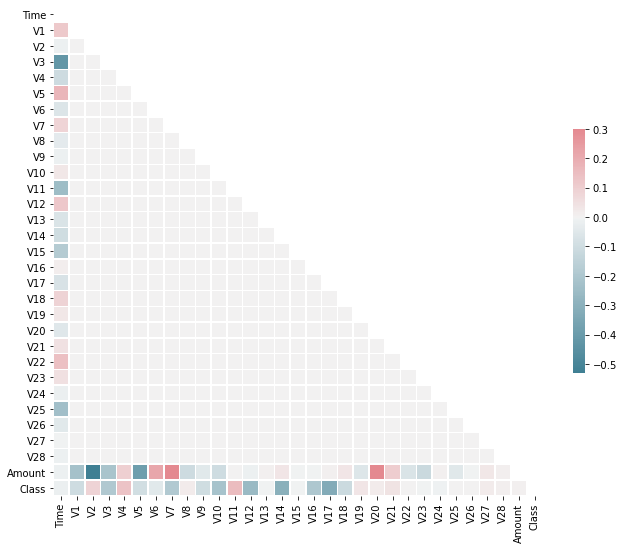

In [42]:
# Plot out the variables of the data
corr=df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

array([<AxesSubplot:ylabel='a'>, <AxesSubplot:ylabel='b'>], dtype=object)

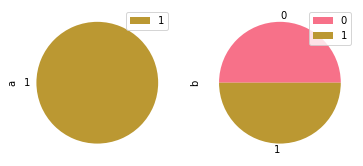

In [43]:
# Another view from a pie chart
not_fraud = len(equalized_df[equalized_df['Class'] == 0].values)
fraud = len(equalized_df[equalized_df['Class'] == 1].values)

pie_chart = pd.DataFrame({'a': [0, 1],'b': [not_fraud, fraud]})
pie_chart.plot.pie(subplots=True)

#### TRAIN DATA

In [45]:
# We will train the data using the Random Forest algorithm
# This algorithm has been proven to be considerably accurate
# I tried multiple algorithms such as Naive_Bayes, Decision Tree, and Linear Regression
training,test = train_test_split(equalized_df, train_size = 0.7, test_size = 0.3, shuffle=True)
training, valid = train_test_split(training, train_size = 0.7, test_size =0.3, shuffle=True) 

training_label = training.pop('Class')
test_label = test.pop('Class')
valid_label = valid.pop('Class')

#### TEST MODEL

In [59]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

# instantiate the algorithms
rfc = RandomForestClassifier()

# train the models
rfc.fit(training, training_label)

# try and predict an outcome from the test set
rfc_predict = rfc.predict(test)

# judge accuracy using built-in function 
accuracy = dict()
accuracy['RandomForest'] = accuracy_score(test_label,rfc_predict)

In [60]:
# Test Accuracy
pp.pprint(accuracy)

{'RandomForest': 1.0}


In [61]:
# perform validation testing for dataset
rfc_predict = rfc.predict(valid)

# judge accuracy using built-in function
accuracy['RandomForest'] = accuracy_score(valid_label,rfc_predict)

In [62]:
# Valid accuracy
pp.pprint(accuracy)

{'RandomForest': 1.0}
